In [20]:
# Loading data from excel of performances

import pandas as pd
from google.colab import files

uploaded = files.upload() #if used in colab, otherwise substituct with "path/to/your/file.xlsx"

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_csv(fn) # Assuming the uploaded file is an Excel file.
print(df.head())


Saving all_results.csv to all_results (4).csv
User uploaded file "all_results (4).csv" with length 1474 bytes
   Threshold       MCC E-value source Test set
0    0.10000  0.929388       full-seq     set1
1    0.01000  0.961548       full-seq     set1
2    0.00100  0.981492       full-seq     set1
3    0.00010  0.991941       full-seq     set1
4    0.00001  0.994547       full-seq     set1


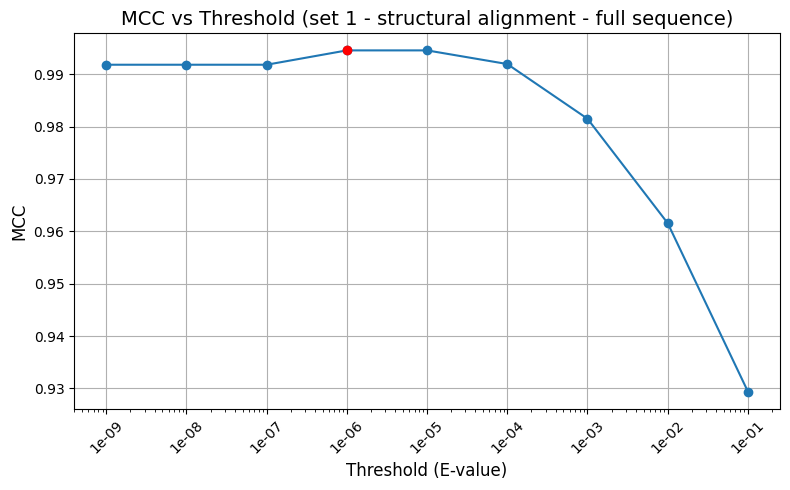

In [21]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# For set1 - full-seq performances
filtered_df = df[(df['Test set'] == 'set1') & (df['E-value source'] == 'full-seq')]

# Plot MCC vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(filtered_df['Threshold'], filtered_df['MCC'], marker='o')
plt.xlabel('Threshold (E-value)', fontsize=12)
plt.ylabel('MCC', fontsize=12)
plt.title('MCC vs Threshold (set 1 - structural alignment - full sequence)', fontsize=14)
plt.xscale('log')  # log scale to make more readable and appreciable the evaluation
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))  # to write thresholds in format like 1e-0*
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# plot the max MCC point on the plot and if more thresholds has the same MCC take the bigger threshold
max_mcc = filtered_df['MCC'].max()
best_rows = filtered_df[filtered_df['MCC'] == max_mcc]
min_idx = best_rows['Threshold'].astype(float).idxmin()
max_threshold = filtered_df.loc[min_idx, 'Threshold']
plt.scatter([max_threshold], [max_mcc], color='red', zorder=5, label='Max MCC')
plt.show()



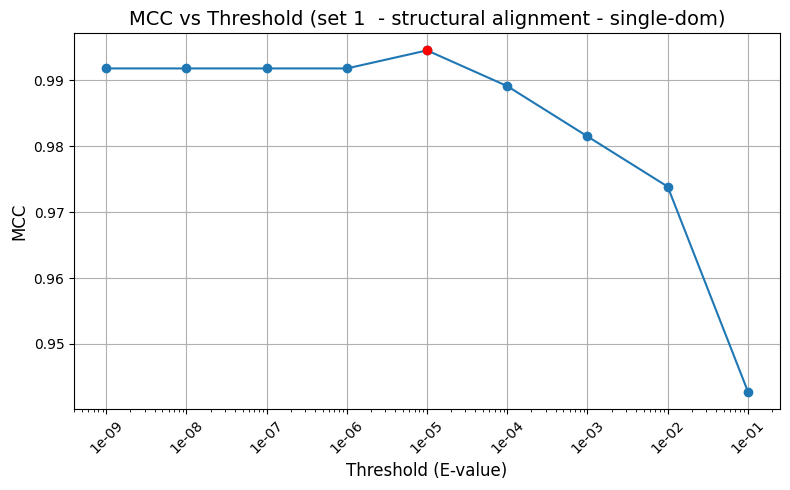

In [22]:

# For set1 - single-dom performances
filtered_df = df[(df['Test set'] == 'set1') & (df['E-value source'] == 'single-dom')]

# Plot MCC vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(filtered_df['Threshold'], filtered_df['MCC'], marker='o')
plt.xlabel('Threshold (E-value)', fontsize=12)
plt.ylabel('MCC', fontsize=12)
plt.title('MCC vs Threshold (set 1  - structural alignment - single-dom)', fontsize=14)
plt.xscale('log')   # log scale to make more readable and appreciable the evaluation
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))  # to write thresholds in format like 1e-0*
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# plot the max MCC point on the plot and if more thresholds has the same MCC take the bigger threshold
max_mcc = filtered_df['MCC'].max()
best_rows = filtered_df[filtered_df['MCC'] == max_mcc]
min_idx = best_rows['Threshold'].astype(float).idxmin()
max_threshold = filtered_df.loc[min_idx, 'Threshold']
plt.scatter([max_threshold], [max_mcc], color='red', zorder=5, label='Max MCC')
plt.show()


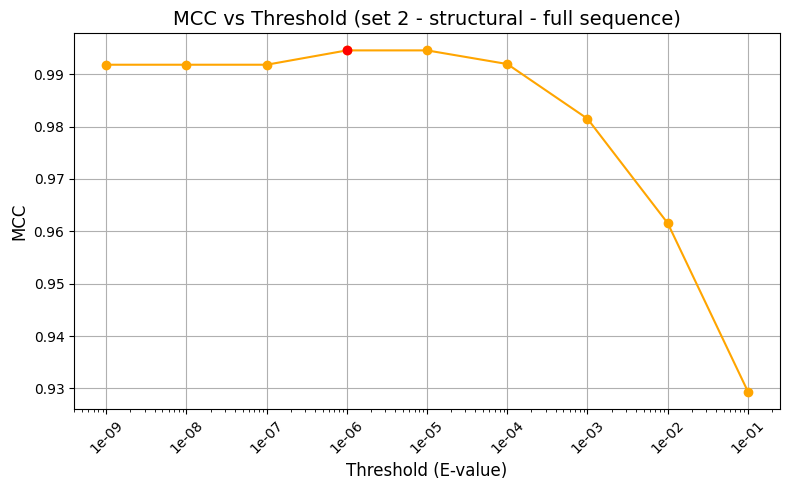

In [23]:

# For set2 - full-seq performances
filtered_df = df[(df['Test set'] == 'set2') & (df['E-value source'] == 'full-seq')]

# Plot MCC vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(filtered_df['Threshold'], filtered_df['MCC'], marker='o', color="orange")
plt.xlabel('Threshold (E-value)', fontsize=12)
plt.ylabel('MCC', fontsize=12)
plt.title('MCC vs Threshold (set 2 - structural - full sequence)', fontsize=14)
plt.xscale('log')  # log scale to make more readable and appreciable the evaluation
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e')) # to write thresholds in format like 1e-0*
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# plot the max MCC point on the plot and if more thresholds has the same MCC take the bigger threshold
max_mcc = filtered_df['MCC'].max()
best_rows = filtered_df[filtered_df['MCC'] == max_mcc]
min_idx = best_rows['Threshold'].astype(float).idxmin()
max_threshold = filtered_df.loc[min_idx, 'Threshold']
plt.scatter([max_threshold], [max_mcc], color='red', zorder=5, label='Max MCC')
plt.show()


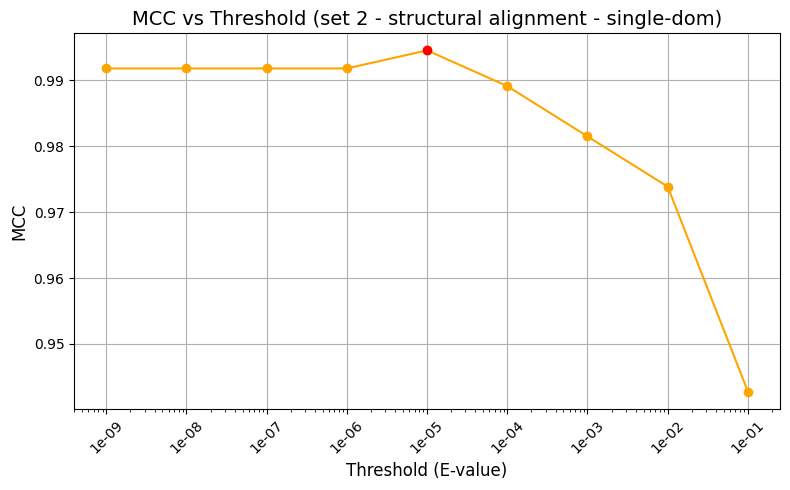

In [24]:
# For set2 - single-dom performances
filtered_df = df[(df['Test set'] == 'set2') & (df['E-value source'] == 'single-dom')]

# Plot MCC vs Threshold
plt.figure(figsize=(8, 5))
plt.plot(filtered_df['Threshold'], filtered_df['MCC'], marker='o',color="orange")
plt.xlabel('Threshold (E-value)', fontsize=12)
plt.ylabel('MCC', fontsize=12)
plt.title('MCC vs Threshold (set 2 - structural alignment - single-dom)', fontsize=14)
plt.xscale('log')  # log scale to make more readable and appreciable the evaluation
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))  # to write thresholds in format like 1e-0*
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# plot the max MCC point on the plot and if more thresholds has the same MCC take the bigger threshold
max_mcc = filtered_df['MCC'].max()
best_rows = filtered_df[filtered_df['MCC'] == max_mcc]
min_idx = best_rows['Threshold'].astype(float).idxmin()
max_threshold = filtered_df.loc[min_idx, 'Threshold']
plt.scatter([max_threshold], [max_mcc], color='red', zorder=5, label='Max MCC')  # Punto rosso
plt.show()

In [25]:


# Select the row with the highest MCC for each combination of set and E-value type
summary = (
    df.loc[df.groupby(['Test set', 'E-value source'])['MCC'].idxmax()]
    .sort_values(['E-value source','Test set'])
    .reset_index(drop=True)
    [['Test set', 'E-value source', 'Threshold', 'MCC']]
)

from IPython.display import display, Latex

# Generate LaTeX string from DataFrame
latex_code = summary.to_latex(index=False, caption="Best threshold and MCC for each set and E-value source", label="tab:best_thresholds")

# Display it as rendered LaTeX in Colab
display(Latex(latex_code))


# Format threshold column in scientific notation
summary['Threshold'] = summary['Threshold'].apply(lambda x: f'{x:.0e}')

# Reorder and rename columns for export
export_df = summary[['Test set', 'E-value source', 'Threshold', 'MCC']]
export_df.columns = ['Test set', 'E-value source', 'Threshold', 'MCC']

# Generate LaTeX code (just the tabular part)
latex_code = export_df.to_latex(index=False, escape=False)

# Add table environment with caption and label
full_latex = r"""\documentclass{article}
\usepackage{booktabs}
\usepackage{caption}
\usepackage[a4paper,margin=1in]{geometry}

\begin{document}

\begin{table}[htbp]
\centering
\caption{Best threshold and MCC for each set and E-value type}
\label{tab:best_thresholds}
""" + latex_code + r"""\end{table}

\end{document}
"""


# Save to file
with open("best_thresholds_table_strali.tex", "w") as f: #change this with best_thresholds_table_seqali if you are performing sequence alignment results analysis, or the name you prefer
    f.write(full_latex)

# Download the file
files.download("best_thresholds_table_strali.tex") #change this with best_thresholds_table_seqali if you are performing sequence alignment results analysis, or the name you prefer

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>